# Introduction à la classiﬁcation

# Plus Proche Voisin 

In [1]:
import numpy as np
from sklearn import datasets
from sklearn import neighbors
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from collections import Counter
from functools import reduce

In [2]:
iris = datasets.load_iris() 
X = iris.data 
Y = iris.target


In [3]:
def misclass_assessment(l_1, l_2):
    """ misclass_assessment : Retourne le pourcentage de
    mauvaise classification
    """
    # Check input
    assert type(l_1) == type(l_2)

    size = len(l_1)
    if size != len(l_2):
        logging.error("Liste de taille differente")
        return 0

    _sum = 0
    for i in range(size):
        if l_1[i] != l_2[i]:
            _sum += 1

    return _sum*100 / float(size)

In [4]:
def PPV(X,Y, k):
    """ PPV : Plus Proche Voisin
    """
    # Constant
    data_size = len(X)

    # ppv_target contient les nouvelles etiquettes
    ppv_target = np.zeros(data_size, dtype=np.int)
    
    # Cross validation
    for i in range(data_size):
        valid = X[i]
        train = np.delete(X, i, 0)
        train_target = np.delete(Y, i, 0)
        assert data_size-1 == len(train)

        dist = list(euclidean_distances(train, valid.reshape(1, -1)))

        # Select class of the closest data
        if k == 1:
            min_dist_idx = np.argmin(dist)
            ppv_target[i] = train_target[min_dist_idx]
        else:
            # Tri croissant -> recup k premier -> recup les index
            sorted_dist = np.sort(dist, kind='heapsort', axis=0)
            kmin_dist = sorted_dist[0:k]
            kmin_dist_index = [dist.index(e) for e in kmin_dist]

            # Compte le nombre d'elem par classe
            class_dist = Counter([train_target[e] for e in kmin_dist_index])

            # Recup la classe majoritaire
            _max = -1
            idx_max = -1
            for key, value in class_dist.items():
                if value > _max:
                    _max = value
                    idx_max = key

            ppv_target[i] = idx_max

    #return {'target': ppv_target, 'error': misclass_assessment(ppv_target, y)}
    return [ppv_target,misclass_assessment(ppv_target, Y)]
    

In [5]:
ppv_target,err=PPV(X,Y,4)
print("target:" ,ppv_target, 'error :' ,err)

target: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2] error : 4.0


In [6]:
from sklearn.metrics import confusion_matrix
# Matrice de Confusion
print("La matrice de confusion : \n")
confusion_matrix(iris.target,ppv_target)


La matrice de confusion : 



array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]], dtype=int64)

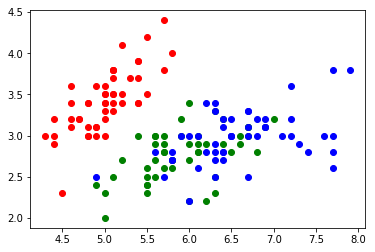

In [7]:
plt.plot(X[Y == 0][:, 0], X[Y == 0][:, 1], "ro") 
plt.plot(X[Y == 1][:, 0], X[Y == 1][:, 1], "go") 
plt.plot(X[Y == 2][:, 0], X[Y == 2][:, 1], "bo")



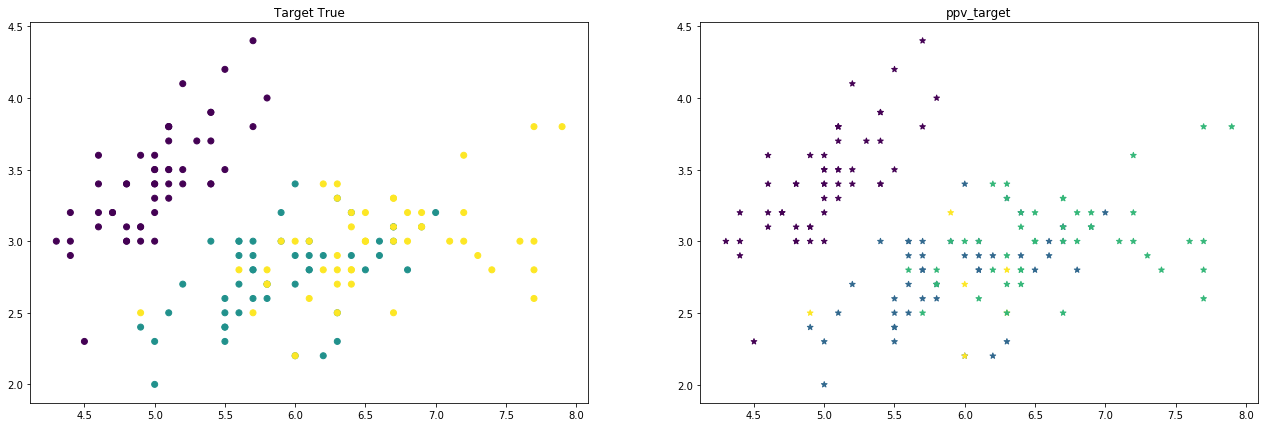

In [8]:

for i in range(len(Y)):
    if Y[i]!=iris.target[i]:
        iris.target[i]=3
    if Y[i]!=ppv_target[i]:
        ppv_target[i]=3

plt.figure(figsize=(22,7))
plt.subplot(121)
plt.scatter(iris.data[:,0], iris.data[:, 1],c=iris.target)
plt.title("Target True")
plt.subplot(122)
plt.scatter(iris.data[:,0], iris.data[:, 1], c=ppv_target,marker='*')
plt.title("ppv_target")
plt.show()

#################


#point abérant

        

In [9]:
# comme la matrice de confusion
def evalu(Y, nY):
    bien_classes = 0
    mal_classes = 0
    for i, j in zip(Y, nY):
        if i==j:
            bien_classes += 1
        else:
            mal_classes += 1 
    return [bien_classes, mal_classes]

In [10]:
from sklearn.neighbors import KNeighborsClassifier #predictions from skikit 
knerrors = []
for i in range(1, 50, 1):
    knY = []
    for j in range(len(X)):
        x_test = X[j]
        x_data = [x for l, x in enumerate(X) if l!=j]
        y_data = [x for l, x in enumerate(Y) if l!=j]
        neigh = KNeighborsClassifier(n_neighbors=i)
        neigh.fit(x_data, y_data)
        knY.append(neigh.predict([x_test]))
    knbien_classes, knmal_classes = evalu(Y, knY)
    knmal_classes_erreur = knmal_classes/len(Y)
    knerrors.append(knmal_classes_erreur)
    
x_la = range(1, 50, 1)


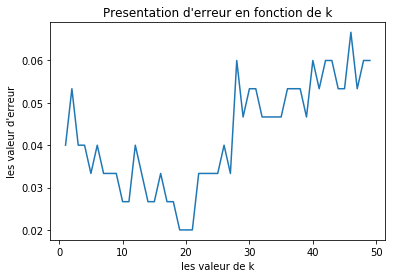

In [11]:
plt.plot(x_la, knerrors)
plt.xlabel('les valeur de k')
plt.ylabel('les valeur d\'erreur')
plt.title('Presentation d\'erreur en fonction de k')
plt.show()

In [12]:
from sklearn.neighbors import KNeighborsClassifier #predictions from skikit 
knn = KNeighborsClassifier(n_neighbors = 4) 
knn.fit(X, Y) 
sk_predictions = knn.predict(X) 

In [13]:
print(" target : ",knn.predict(X))
print(" prediction by scikit learn : ") 
print(100 * np.mean(knn == Y)) 


 target :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
 prediction by scikit learn : 
0.0


# Classiﬁeur Bayesien Naïf

In [14]:
def predic_cross_valid(algo, x, y):
    """train : cross validation
        x = data
        y = target
    """
    #constant
    data_size = len(x)

    predicted_target = np.zeros(data_size, dtype=np.int)

    for i in range(data_size):
        valid = x[i]
        train = np.delete(x, i, 0)
        train_target = np.delete(y, i, 0)

        algo.fit(train, train_target)
        predicted_target[i] = algo.predict(valid.reshape(1, -1))

    return {'target': predicted_target, 'error': misclass_assessment(predicted_target, y)}

In [15]:
def CBN(X, Y):
    """
    Naive bayen classifier
    """
    # Constant
    nb_class = np.unique(Y).size
    data_size = len(X)
    nb_features = X.shape[1]
    proba_class = [e / float(len(X)) for e in Counter(Y).values()]

    
    print("Number of classes : %s", nb_class)
    print("***_***_***_***"*6,"\n")
    print("Number of features : %s", nb_features)
    print("***_***_***_***"*6,"\n")
    print("Proba class : %s", proba_class)
    print("***_***_***_***"*6,"\n")
    # cbn_target represente les nouvelles etiquettes
    cbn_target = np.zeros(data_size, dtype=np.int)

    # Cross validation
    # Choisi une observation parmis les donnees
    # Genere la matrice d'apprentissge en excluant l'observation precedente
    for i in range(data_size):
        valid = X[i]
        train = np.delete(X, i, 0)
        train_target = np.delete(Y, i, 0)
        assert data_size-1 == len(train)

        
        

        # Regroupe les donnees par classe et calcule leurs barycentres
        data_pclass = {}
        mean_pclass = {}
        for j in range(nb_class):
            data_pclass[j] = [e for k, e in enumerate(train) if train_target[k] == j]
            mean_pclass[j] = np.mean(a=data_pclass[j], axis=0)
            ###
            # a faire ......
            ###
            
            print("***_***_***_***"*6,"\n")
            print("Mean per classes : %s", mean_pclass)
            print("***_***_***_***"*6,"\n")

        # Calcule des distances
        # dist represente la distance entre la donnee x et le barycentre pour chaque classe
        # dist_total est la somme des distances par classe
        dist = [abs(valid-barycentre) for barycentre in mean_pclass.values()]
        dist_total = np.sum(dist, axis=0)

        
        

        # Calcule de la probabilite PROD(P(xi/wk)P(wk))
        # xi/wk = une donne x avec la valeur xi pour la variable i de la classe wk
        tmp = (1-(dist/dist_total))*(1./3)
        tmp = [reduce(lambda X, Y: X*Y, value) for value in tmp]
        """print("TMP : %s", tmp)
        print("TEST : %s", np.argmax(tmp))"""

        cbn_target[i] = np.argmax(tmp)

    #return {'target': cbn_target, 'error': misclass_assessment(cbn_target, y)}
    return [cbn_target,misclass_assessment(cbn_target, Y)]

In [16]:
cbn_target,misclass= CBN(X, Y)
print("CBN_target \n",cbn_target)
print("\n")
print("error rate \n",misclass)


Number of classes : %s 3
***_***_***_******_***_***_******_***_***_******_***_***_******_***_***_******_***_***_*** 

Number of features : %s 4
***_***_***_******_***_***_******_***_***_******_***_***_******_***_***_******_***_***_*** 

Proba class : %s [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
***_***_***_******_***_***_******_***_***_******_***_***_******_***_***_******_***_***_*** 

***_***_***_******_***_***_******_***_***_******_***_***_******_***_***_******_***_***_*** 

Mean per classes : %s {0: array([5.00408163, 3.42653061, 1.46326531, 0.24693878])}
***_***_***_******_***_***_******_***_***_******_***_***_******_***_***_******_***_***_*** 

***_***_***_******_***_***_******_***_***_******_***_***_******_***_***_******_***_***_*** 

Mean per classes : %s {0: array([5.00408163, 3.42653061, 1.46326531, 0.24693878]), 1: array([5.936, 2.77 , 4.26 , 1.326])}
***_***_***_******_***_***_******_***_***_******_***_***_******_***_***_******_***_***_*** 

***_***_***_**

***_***_***_******_***_***_******_***_***_******_***_***_******_***_***_******_***_***_*** 

***_***_***_******_***_***_******_***_***_******_***_***_******_***_***_******_***_***_*** 

Mean per classes : %s {0: array([5.        , 3.42244898, 1.46122449, 0.24693878]), 1: array([5.936, 2.77 , 4.26 , 1.326])}
***_***_***_******_***_***_******_***_***_******_***_***_******_***_***_******_***_***_*** 

***_***_***_******_***_***_******_***_***_******_***_***_******_***_***_******_***_***_*** 

Mean per classes : %s {0: array([5.        , 3.42244898, 1.46122449, 0.24693878]), 1: array([5.936, 2.77 , 4.26 , 1.326]), 2: array([6.588, 2.974, 5.552, 2.026])}
***_***_***_******_***_***_******_***_***_******_***_***_******_***_***_******_***_***_*** 

***_***_***_******_***_***_******_***_***_******_***_***_******_***_***_******_***_***_*** 

Mean per classes : %s {0: array([5.00612245, 3.43061224, 1.46326531, 0.24693878])}
***_***_***_******_***_***_******_***_***_******_***_***_******_***_***_*


***_***_***_******_***_***_******_***_***_******_***_***_******_***_***_******_***_***_*** 

Mean per classes : %s {0: array([5.006, 3.428, 1.462, 0.246])}
***_***_***_******_***_***_******_***_***_******_***_***_******_***_***_******_***_***_*** 

***_***_***_******_***_***_******_***_***_******_***_***_******_***_***_******_***_***_*** 

Mean per classes : %s {0: array([5.006, 3.428, 1.462, 0.246]), 1: array([5.91836735, 2.76938776, 4.24897959, 1.3244898 ])}
***_***_***_******_***_***_******_***_***_******_***_***_******_***_***_******_***_***_*** 

***_***_***_******_***_***_******_***_***_******_***_***_******_***_***_******_***_***_*** 

Mean per classes : %s {0: array([5.006, 3.428, 1.462, 0.246]), 1: array([5.91836735, 2.76938776, 4.24897959, 1.3244898 ]), 2: array([6.588, 2.974, 5.552, 2.026])}
***_***_***_******_***_***_******_***_***_******_***_***_******_***_***_******_***_***_*** 

***_***_***_******_***_***_******_***_***_******_***_***_******_***_***_******_***_***_*** 


***_***_***_******_***_***_******_***_***_******_***_***_******_***_***_******_***_***_*** 

Mean per classes : %s {0: array([5.006, 3.428, 1.462, 0.246]), 1: array([5.936, 2.77 , 4.26 , 1.326]), 2: array([6.59387755, 2.9755102 , 5.55102041, 2.03061224])}
***_***_***_******_***_***_******_***_***_******_***_***_******_***_***_******_***_***_*** 

***_***_***_******_***_***_******_***_***_******_***_***_******_***_***_******_***_***_*** 

Mean per classes : %s {0: array([5.006, 3.428, 1.462, 0.246])}
***_***_***_******_***_***_******_***_***_******_***_***_******_***_***_******_***_***_*** 

***_***_***_******_***_***_******_***_***_******_***_***_******_***_***_******_***_***_*** 

Mean per classes : %s {0: array([5.006, 3.428, 1.462, 0.246]), 1: array([5.936, 2.77 , 4.26 , 1.326])}
***_***_***_******_***_***_******_***_***_******_***_***_******_***_***_******_***_***_*** 

***_***_***_******_***_***_******_***_***_******_***_***_******_***_***_******_***_***_*** 

Mean per classes : %

Mean per classes : %s {0: array([5.006, 3.428, 1.462, 0.246]), 1: array([5.936, 2.77 , 4.26 , 1.326])}
***_***_***_******_***_***_******_***_***_******_***_***_******_***_***_******_***_***_*** 

***_***_***_******_***_***_******_***_***_******_***_***_******_***_***_******_***_***_*** 

Mean per classes : %s {0: array([5.006, 3.428, 1.462, 0.246]), 1: array([5.936, 2.77 , 4.26 , 1.326]), 2: array([6.56122449, 2.95714286, 5.53469388, 2.02653061])}
***_***_***_******_***_***_******_***_***_******_***_***_******_***_***_******_***_***_*** 

***_***_***_******_***_***_******_***_***_******_***_***_******_***_***_******_***_***_*** 

Mean per classes : %s {0: array([5.006, 3.428, 1.462, 0.246])}
***_***_***_******_***_***_******_***_***_******_***_***_******_***_***_******_***_***_*** 

***_***_***_******_***_***_******_***_***_******_***_***_******_***_***_******_***_***_*** 

Mean per classes : %s {0: array([5.006, 3.428, 1.462, 0.246]), 1: array([5.936, 2.77 , 4.26 , 1.326])}
***_***_**

In [17]:
bien_classes, mal_classes = evalu(Y, cbn_target)
print('Les bien classe nomber est : ', bien_classes)
print('Les mal classes nomber est : ', mal_classes)
mal_classes_erreur = mal_classes/len(Y)
print('erreur est : ', mal_classes_erreur*100, '%')

Les bien classe nomber est :  131
Les mal classes nomber est :  19
erreur est :  12.666666666666668 %


In [18]:
from sklearn.metrics import confusion_matrix
# Matrice de Confusion
print("La matrice de confusion CBN: \n")
confusion_matrix(iris.target,cbn_target)


La matrice de confusion CBN: 



array([[50,  0,  0],
       [ 0, 42,  8],
       [ 0, 11, 39]], dtype=int64)

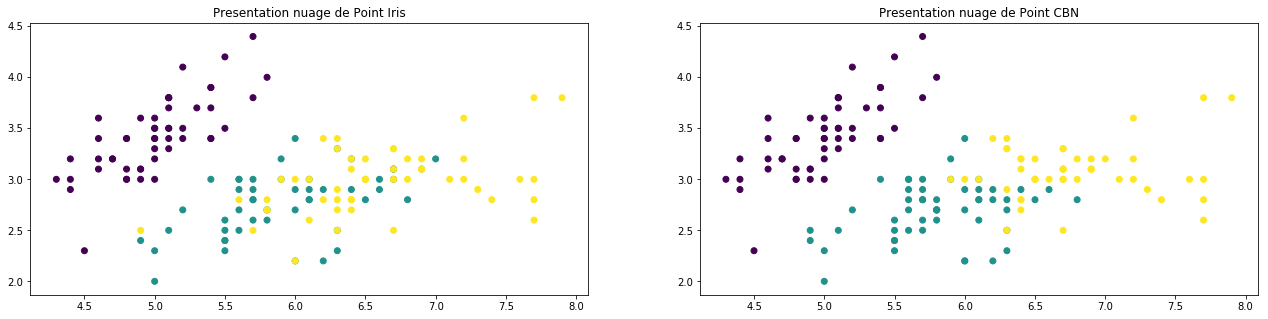

In [31]:
plt.figure(figsize=(22,5))
plt.subplot(121)
plt.scatter(X[:,0], X[:,1], c=Y)
plt.title('Presentation nuage de Point Iris')
plt.subplot(122)
plt.scatter(X[:,0], X[:,1], c=cbn_target)
plt.title('Presentation nuage de Point CBN')
plt.show()

In [20]:
from sklearn import naive_bayes
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB().fit(X, Y)


In [29]:
gpred = clf.predict(X)

print("Target Predicted: \n",gpred)

Target Predicted: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [23]:
bien_classes, mal_classes = evalu(Y, gpred)
print('Les bien classe nomber est : ', bien_classes)
print('Les mal classes nomber est : ', mal_classes)
mal_classes_erreur = mal_classes/len(Y)
print('erreur est : ', mal_classes_erreur*100, '%')

Les bien classe nomber est :  144
Les mal classes nomber est :  6
erreur est :  4.0 %


In [26]:
from sklearn.metrics import confusion_matrix
# Matrice de Confusion
print("La matrice de confusion GaussianNB: \n")
confusion_matrix(Y,gpred)


La matrice de confusion GaussianNB: 



array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]], dtype=int64)